In [1]:
from docplex.mp.model import Model
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_data(num_locations):
    np.random.seed(42)
    locations = np.random.randint(1,100,(num_locations,2)) #depot: location[0]
    num_customers = num_locations - 1

    return locations, num_customers

In [3]:
def calculate_distance(locations,num_locations):
    distances = np.zeros((num_locations,num_locations))
    for i in range(num_locations):
        for j in range(i+1,num_locations):
            distances[i,j] = np.linalg.norm(locations[i]-locations[j])
            distances[j,i] = distances[i,j]
            
    return distances

In [4]:
def cplex_solve(num_locations):
    locations,num_customers = create_data(num_locations)
    distances = calculate_distance(locations,num_locations)

    m = Model('VRP')

    # decision variable
    x = m.binary_var_matrix(keys1=num_locations,keys2=num_locations,name='x')
    y = m.integer_var_list(keys=num_locations, name='y')

    #objective
    m.minimize(m.sum(distances[i,j]*x[i,j] for i in range(num_locations) for j in range(num_locations)))

    #constraint
    m.add_constraints([m.sum(x[i,j] for i in range(num_locations))==1 for j in range(1,num_locations)])
    m.add_constraints([m.sum(x[i,j] for j in range(num_locations))==1 for i in range(1,num_locations)])

    m.add_constraints([m.sum(x[i,h] for i in range(num_locations))-m.sum(x[h,j] for j in range(num_locations))==0 for h in range(1,num_locations)])

    m.add_constraints([m.sum(x[0,j] for j in range(1,num_locations))==1])
    m.add_constraints([m.sum(x[i,0] for i in range(1,num_locations))==1])

    # subtour elimination
    for i in range(1,num_locations):
        for j in range(1,num_locations):
                m.add_constraints([y[i]-y[j]+(1+num_customers)*x[i,j]<=num_customers])

    #y is positive
    for i in range(1,num_locations):
        m.add_constraints([y[i] >= 0])

    print('< Model Info >')
    m.print_information()
    print()

    sol=m.solve()
    
    print('< Model Report >')
    m.report()
    print()

    print('< Solve Details >')
    print(m.solve_details)
    print()
    
    '''print('< Model Gap >')
    gap = float(m.solve_details.gap)
    formatted_gap = "{:.15f}".format(gap)
    print("Gap:", formatted_gap)'''

    return m,sol,locations

In [5]:
def results_visualization(locations,num_locations,sol):

    for i in range(len(locations)):
        j = locations[i]
        if i == 0:
            plt.scatter(j[0],j[1],color='r')
            plt.text(j[0],j[1]+1,'{} (depot)'.format(i))
        else:
            plt.scatter(j[0],j[1],color='b')
            plt.text(j[0],j[1]+1,'{}'.format(i))

    for i in range(num_locations):
        for j in range(num_locations):
            if sol['x_{}_{}'.format(i,j)] == 1:
                plt.plot([locations[i][0],locations[j][0]],[locations[i][1],locations[j][1]],color='gray',alpha=0.3)

In [6]:
num_locations = 20

In [7]:
m,solution,locations=cplex_solve(num_locations)

< Model Info >
Model: VRP
 - number of variables: 420
   - binary=400, integer=20, continuous=0
 - number of constraints: 439
   - linear=439
 - parameters: defaults
 - objective: minimize
 - problem type is: MILP

< Model Report >
* model VRP solved with objective = 393.007

< Solve Details >
status  = integer optimal solution
time    = 0.234 s.
problem = MILP
gap     = 0%




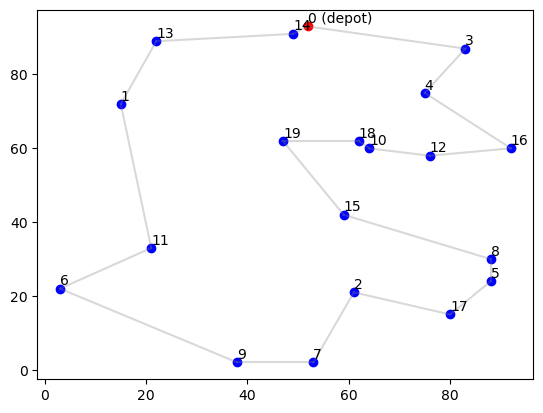

In [8]:
results_visualization(locations,num_locations,solution)

In [11]:
def data_size(start_l,end_l):
    time_list = []
    objectval = []
    gap = []
    data_num = [i for i in range(start_l,end_l+1,10)]

    for i in range(start_l,end_l+1,10):
        m,solution,locations=cplex_solve(i)
        time_list.append(m.solve_details.time)
        if solution is None:
            gap.append(-1)
            objectval.append(-1)
        else:
            gap.append(m.solve_details.gap)
            objectval.append(solution.get_objective_value())
    
    plt.plot(data_num,time_list)
    plt.xlabel('Data Size')
    plt.ylabel('Time (s)')
    plt.title('')
    plt.show()
    
    plt.plot(data_num,objectval)
    plt.xlabel('Data Size')
    plt.ylabel('Objective')
    plt.show()

< Model Info >
Model: VRP
 - number of variables: 110
   - binary=100, integer=10, continuous=0
 - number of constraints: 119
   - linear=119
 - parameters: defaults
 - objective: minimize
 - problem type is: MILP

< Model Report >
* model VRP solved with objective = 295.895

< Solve Details >
status  = integer optimal solution
time    = 0.032 s.
problem = MILP
gap     = 0%


< Model Info >
Model: VRP
 - number of variables: 420
   - binary=400, integer=20, continuous=0
 - number of constraints: 439
   - linear=439
 - parameters: defaults
 - objective: minimize
 - problem type is: MILP

< Model Report >
* model VRP solved with objective = 393.007

< Solve Details >
status  = integer optimal solution
time    = 0.203 s.
problem = MILP
gap     = 0%


< Model Info >
Model: VRP
 - number of variables: 930
   - binary=900, integer=30, continuous=0
 - number of constraints: 959
   - linear=959
 - parameters: defaults
 - objective: minimize
 - problem type is: MILP

< Model Report >
* model VR

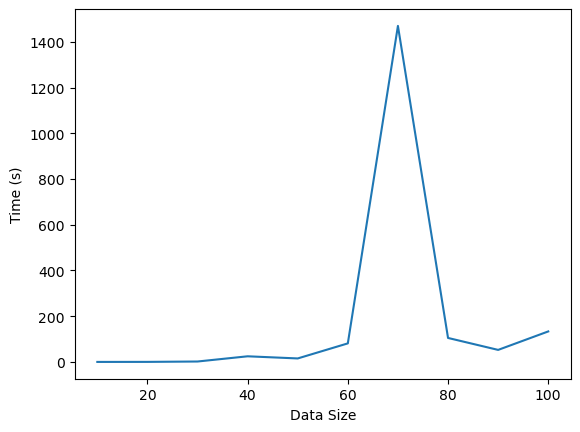

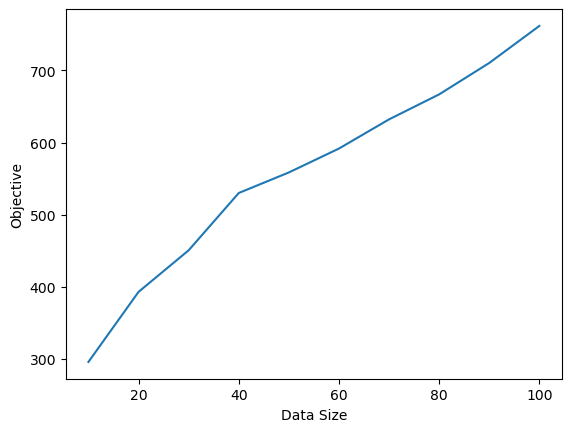

In [12]:
data_size(10,100)